In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0.1, 8, num=100)
# x = np.array([0.3, 0.5, 1.0, 1.2, 1.5, 2.0, 3.0])
x // 1
x_big = np.clip(x // 1, 0, 1)
x_small = np.abs(x_big - 1)
x_big, x_small

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [3]:
def alpha_fn(alpha=1.0):
    if alpha == 1.0:
        f = lambda x: x * np.log(x) - (x - 1)
    elif alpha == 0.0:
        f = lambda x: - np.log(x) + (x - 1)
    else:
        f = lambda x: ((np.power(x, alpha) - 1) - alpha * (x - 1)) / (alpha * (alpha - 1))
    return f

In [4]:
alphas = [10.0, 20.0, 30.0, 40.0]
beta = 1e-10
f_bigs = [alpha_fn(alpha=alpha) for alpha in alphas]
f_smalls = [alpha_fn(alpha=0.5 - (alpha - 0.5)) for alpha in alphas]

In [8]:
div_mixes = [x_big * f_big(x) + x_small * f_small(x) for (f_big, f_small) in zip(f_bigs, f_smalls)]

In [11]:
f_kl = alpha_fn(alpha=1.0)
f_rkl = alpha_fn(alpha=0.0)
div_kl = f_kl(x)
div_rkl = f_rkl(x)

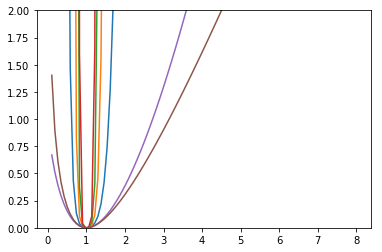

In [13]:
fig = plt.figure()
for i, div_mix in enumerate(div_mixes):
    plt.plot(x, div_mix)
plt.plot(x, div_kl)
plt.plot(x, div_rkl)
plt.ylim(0, 2)
plt.show()